In [2]:
import numpy as np
import matplotlib.pyplot as plt
#import cv2
import rasterio

# Imagen

Una imagen transmite información acerca de una posición, tamaño o interrelación entre objetos. Estos objetos a su vez transmiten niveles más profundos en su significado, los cuales interpretamos gracias a nuestra habilidad de derivar la información a través de nuestra experiencia.

No obstante, nuestra capacidad para extraer información de una imagen no es innata. Algunas imágenes como las fotografías aéreas o satelitales poseen algunas propiedades que no son visibles al ojo humano (radiación, espectros). Sin embargo, es una habilidad que podemos desarrollar empleando las herramientas adecuadas.

In [3]:
logo = plt.imread("OIP.jpg")

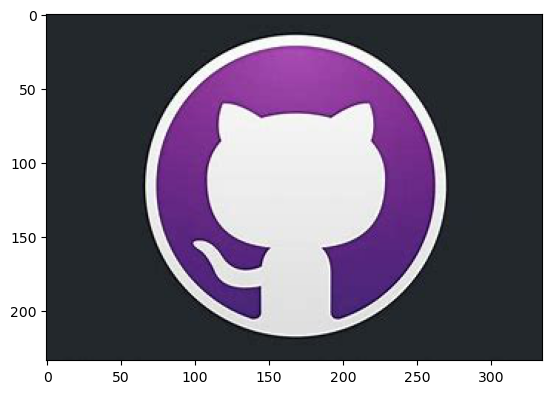

In [4]:
plt.imshow(logo)

## Píxeles

Los píxeles son puntos de color (incluyendo la escala de grises para imágenes monocromáticas o unibanda) o unidades mínimas de color que comprenden una imagen digital.

Las imágenes se forman como una sucesión de píxeles. La sucesión marca la coherencia de la información presentada, siendo su conjunto una matriz coherente de información para el uso digital. 

El área donde se proyectan estas matrices suele ser rectangular.

### Matriz o sucesión de pixeles

In [5]:
logo

array([[[35, 40, 44],
        [35, 40, 44],
        [35, 40, 44],
        ...,
        [35, 40, 44],
        [35, 40, 44],
        [35, 40, 44]],

       [[35, 40, 44],
        [35, 40, 44],
        [35, 40, 44],
        ...,
        [35, 40, 44],
        [35, 40, 44],
        [35, 40, 44]],

       [[35, 40, 44],
        [35, 40, 44],
        [35, 40, 44],
        ...,
        [35, 40, 44],
        [35, 40, 44],
        [35, 40, 44]],

       ...,

       [[35, 40, 44],
        [35, 40, 44],
        [35, 40, 44],
        ...,
        [35, 40, 44],
        [35, 40, 44],
        [35, 40, 44]],

       [[35, 40, 44],
        [35, 40, 44],
        [35, 40, 44],
        ...,
        [35, 40, 44],
        [35, 40, 44],
        [35, 40, 44]],

       [[35, 40, 44],
        [35, 40, 44],
        [35, 40, 44],
        ...,
        [35, 40, 44],
        [35, 40, 44],
        [35, 40, 44]]], dtype=uint8)

## Canales o bandas de la imagen

 Los canales de una imagen son imágenes en escala de grises que almacenan diferentes tipos de información sobre el color, la transparencia o la selección de una imagen. El número y el tipo de canales dependen del modo de color y del formato de archivo de la imagen.

Los canales más comunes son los siguientes:

Los canales de color se crean automáticamente al abrir una nueva imagen y contienen la información de los colores primarios que forman la imagen. Por ejemplo, una imagen RGB tiene un canal para cada color (rojo, verde y azul), además de un canal compuesto que se utiliza para editar la imagen.

Los canales alfa se pueden añadir manualmente para crear y almacenar máscaras, que permiten manipular o proteger partes específicas de una imagen. Los canales alfa almacenan las selecciones como imágenes en escala de grises, donde el blanco representa la parte seleccionada, el negro la parte no seleccionada y los tonos de gris los niveles de opacidad

En un píxel, comúnmente, se representa con: 8 bits (28 colores), con 24 bits (224 colores, 8 bits por canal de color) o con 48 bits (248 colores); en fotografía avanzada y digitalización de imágenes profesional se utilizan profundidades aún mayores, expresadas siempre en valores de bits/canal de color en lugar de la suma de los tres canales. Los primeros son los más utilizados, reservando el de 8 bits para imágenes de alta calidad pero en tonos de grises, o bien con 256 colores en paleta seleccionada para baja calidad colorimétrica; el de 24 bits es el más común y de alta calidad, se lo utiliza en la mayoría de las imágenes fotográficas.

In [6]:
logo.shape

(234, 335, 3)

### Representación RGB para cada canal

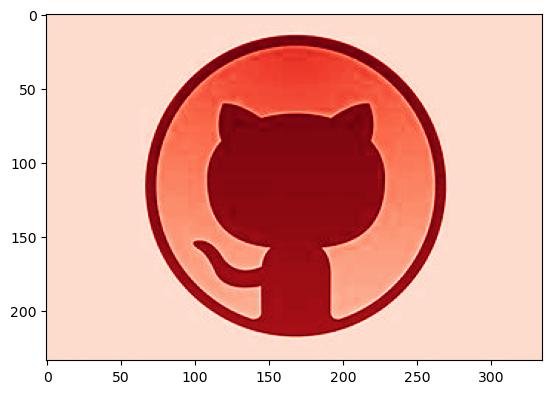

In [7]:
plt.imshow(logo[:,:,0], cmap="Reds")

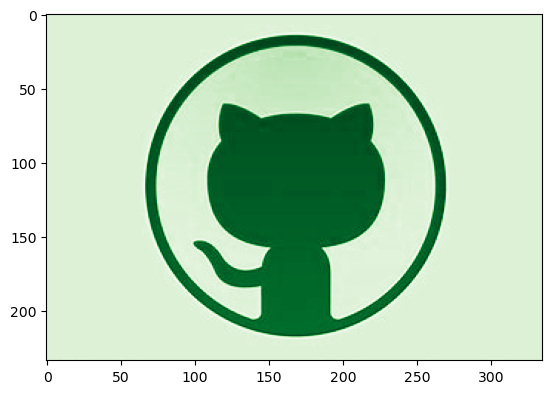

In [8]:
plt.imshow(logo[:,:,1], cmap="Greens")

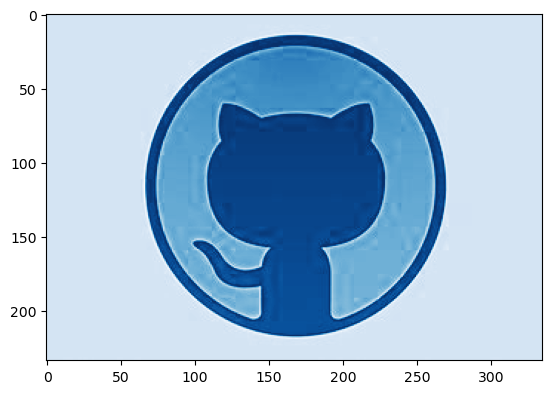

In [9]:
plt.imshow(logo[:,:,2], cmap="Blues")

Cada punto representado en la imagen debe contener información de color, representada en canales separados que representan los componentes primarios del color que se pretende representar, en cualquier modelo de color, bien sea RGB, CMYK, LAB o cualquier otro disponible para su representación.

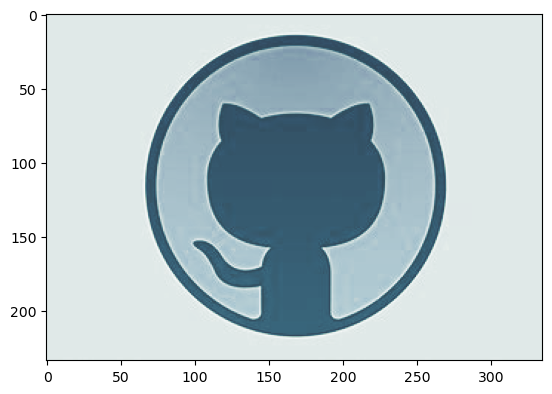

In [10]:
plt.imshow(logo[:,:,0], cmap="Reds",alpha=0.5)
plt.imshow(logo[:,:,1], cmap="Greens",alpha=0.5)
plt.imshow(logo[:,:,2], cmap="Blues",alpha=0.5)

## Profundidad de la imágen

La profundidad representa la cantidad de bits de información necesarios para representar el color de cada píxel en una imagen digital. una profundidad de bits de n implica que cada píxel de la imagen puede tener $2^n$ posibles valores y por lo tanto, representar $2^n$ colores distintos.

In [11]:
bits = np.array([1,2,3,4,5,6,8,9,10,12,16])
colores=[]
for i in bits:
    colores.append(2**i)

In [12]:
colores

[2, 4, 8, 16, 32, 64, 256, 512, 1024, 4096, 65536]

En las imágenes de mapa de bits, o en los dispositivos gráficos, cada píxel se codifica mediante un conjunto de bits de longitud determinada (la profundidad de color); por ejemplo, puede codificarse un píxel con un byte (8 bits), de manera que cada píxel admite hasta 256 variaciones de color (28 posibilidades binarias), de 0 a 255. 

### Profundidad en escala de grises

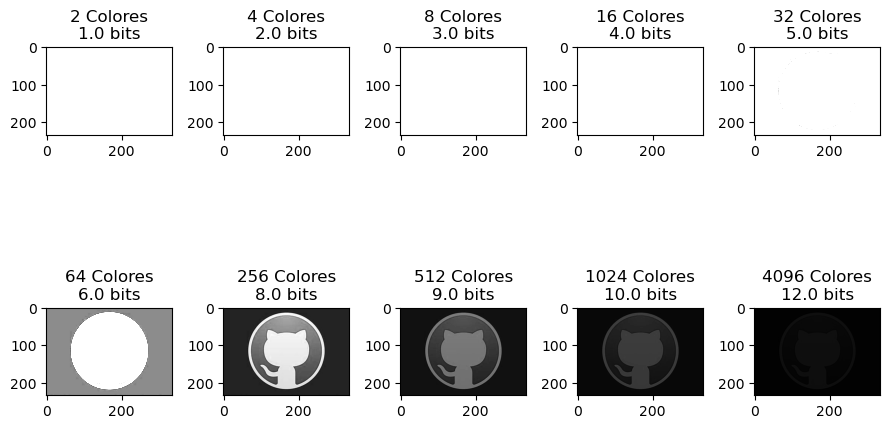

In [13]:
fig, axs = plt.subplots(ncols=5,nrows=2, figsize=(9, 6))

for ax,Ncolor in zip(axs.flat, colores):
    ax.imshow(logo[:,:,0], cmap="gray", vmin =0, vmax=Ncolor)
    ax.set_title(str(Ncolor) + " Colores" + "\n"+str(np.log2(Ncolor))+ " bits")
plt.tight_layout()
plt.show()

## Tamaño del píxel

Los píxeles no tienen un tamaño fijo, sino que dependen del dispositivo que los muestra o los almacena. Por ejemplo, un monitor o una pantalla de un teléfono móvil tienen una cierta cantidad de píxeles por pulgada (ppi o dpi), que indica la densidad o la resolución de la pantalla. Cuanto mayor sea el número de ppi, más pequeños y compactos serán los píxeles, y más calidad tendrá la imagen.


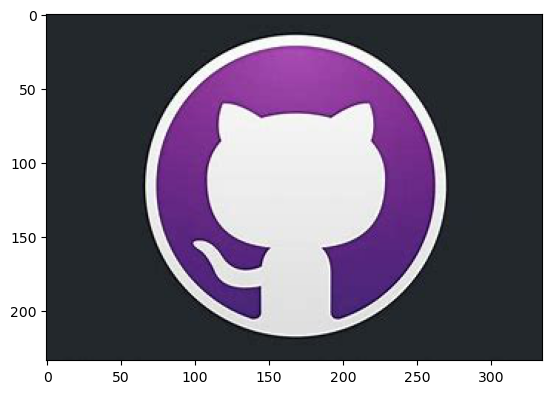

In [14]:
plt.imshow(logo)

### Cambio de extensión espacial

(0.0, 200.0, 0.0, 200.0)

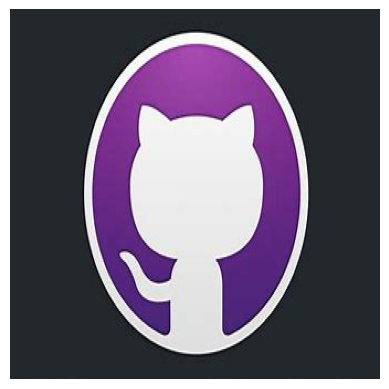

In [15]:
plt.imshow(logo,extent=[0,200,0,200])
plt.axis("off")

(0.0, 100.0, 0.0, 100.0)

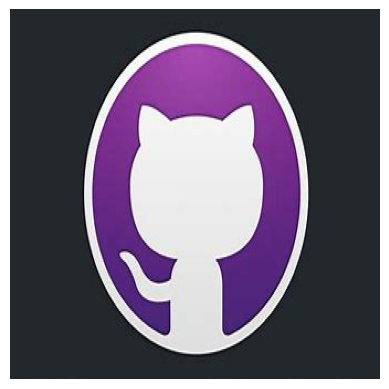

In [16]:
plt.imshow(logo,extent=[0,100,0,100])
plt.axis("off")

(0.0, 50.0, 0.0, 50.0)

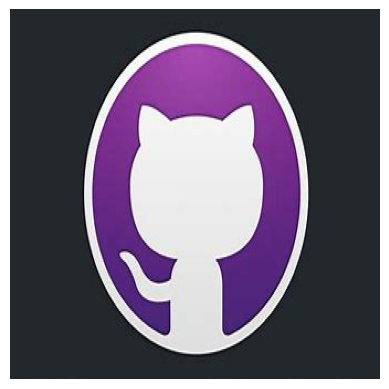

In [17]:
plt.imshow(logo,extent=[0,50,0,50])
plt.axis("off")

(0.0, 300.0, 0.0, 300.0)

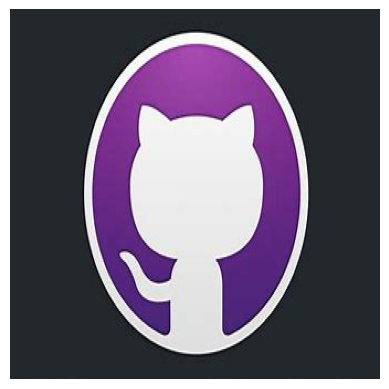

In [18]:
plt.imshow(logo,extent=[0,300,0,300])
plt.axis("off")

(0.0, 400.0, 0.0, 400.0)

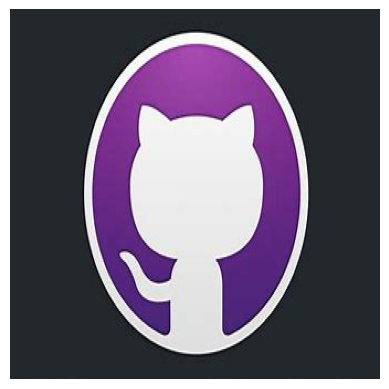

In [19]:
plt.imshow(logo,extent=[0,400,0,400])
plt.axis("off")

(0.0, 800.0, 0.0, 800.0)

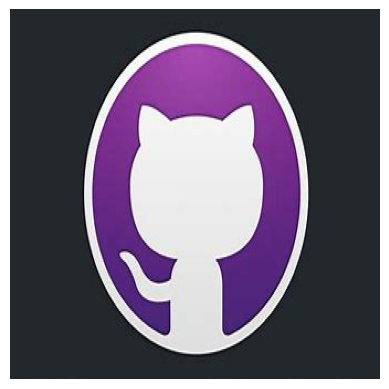

In [20]:
plt.imshow(logo,extent=[0,800,0,800])
plt.axis("off")

### Cambio de dpi

In [21]:
plt.figure(dpi=1)
plt.imshow(logo)
plt.axis("off")

(-0.5, 334.5, 233.5, -0.5)

(-0.5, 334.5, 233.5, -0.5)

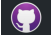

In [22]:
plt.figure(dpi=10)
plt.imshow(logo)
plt.axis("off")

(-0.5, 334.5, 233.5, -0.5)

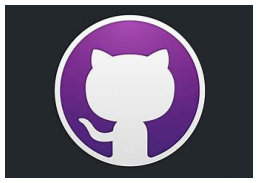

In [23]:
plt.figure(dpi=50)
plt.imshow(logo)
plt.axis("off")

(-0.5, 334.5, 233.5, -0.5)

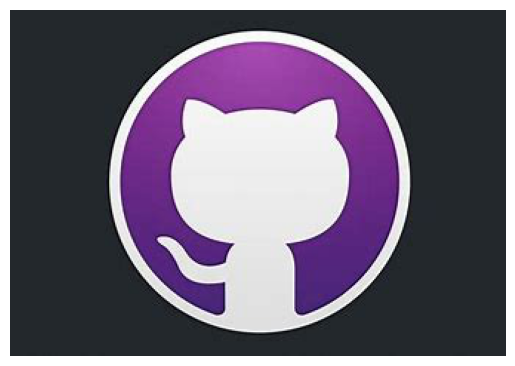

In [24]:
plt.figure(dpi=100)
plt.imshow(logo)
plt.axis("off")

(-0.5, 334.5, 233.5, -0.5)

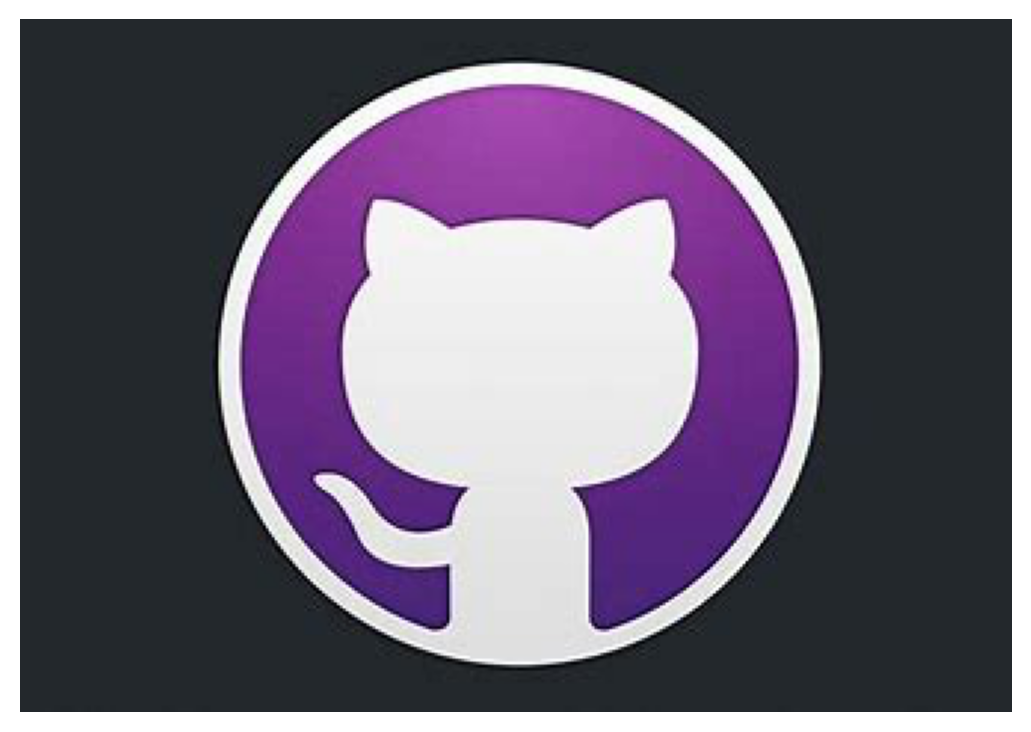

In [25]:
plt.figure(dpi=200)
plt.imshow(logo)
plt.axis("off")

(-0.5, 334.5, 233.5, -0.5)

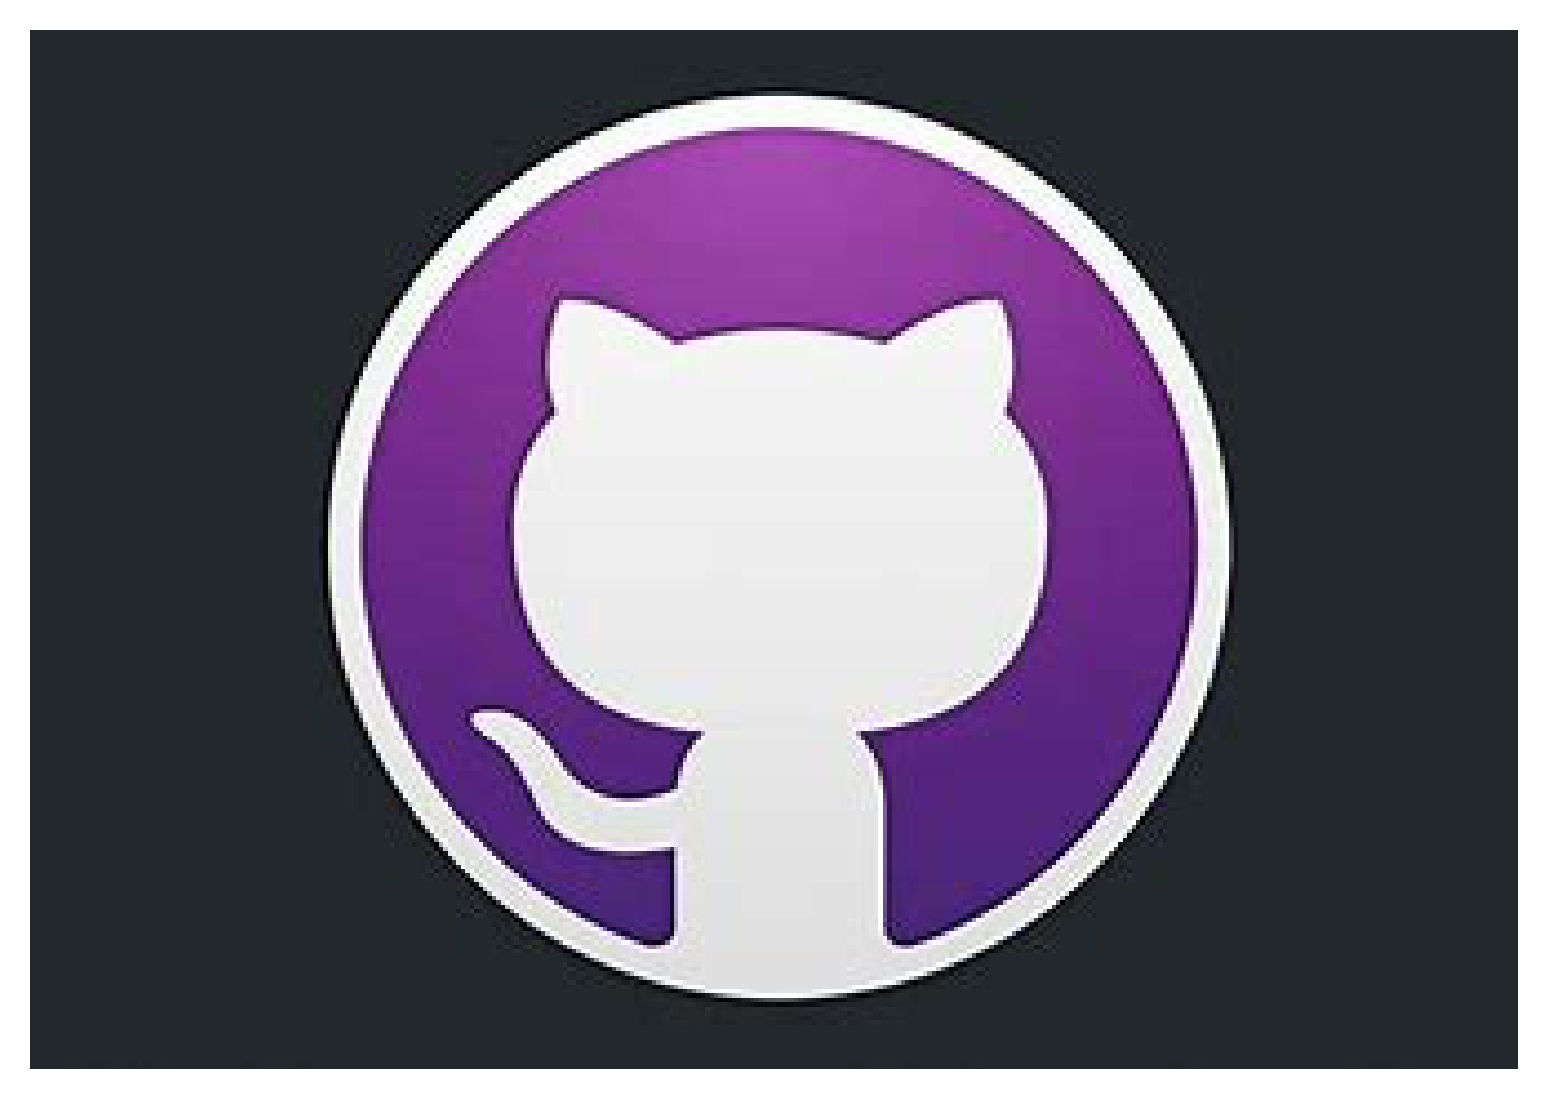

In [26]:
plt.figure(dpi=300)
plt.imshow(logo)
plt.axis("off")